In [14]:
!pip install pyvis

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from itertools import combinations
from pyvis import network as net


In [65]:
data = pd.read_csv('./amazon.csv')
data

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [17]:
database = data[['product_id', 'product_name', 'user_id']]

In [19]:
database['users'] = database['user_id'].apply(lambda x: x.split(','))

/tmp/ipython-input-19-1348482629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  database['users'] = database['user_id'].apply(lambda x: x.split(','))


In [50]:
G = nx.Graph()

nodes = {}

for i, e in database.iterrows():
  G.add_node(e['product_id'], label=e['product_name'])
  nodes[e['product_id']] = {
    "label": e['product_name'],
    "users": e['users']
  }

for prod_id, values in nodes.items():

  for filho_prod_id, filho_values in nodes.items():
    if filho_prod_id == prod_id:
      continue

    conectados = len(set(values['users']) & set(filho_values['users']))
    if conectados > 0:
      G.add_edge(prod_id, filho_prod_id, weighted=conectados)


In [51]:
from pyvis import network as net
g=net.Network(height='400px', width='50%',heading='', notebook=True, cdn_resources='in_line')

g.from_nx(G)

g.show('example.html')
g.show_buttons(filter_=['physics'])
from IPython.core.display import display, HTML
display(HTML('example.html'))

example.html


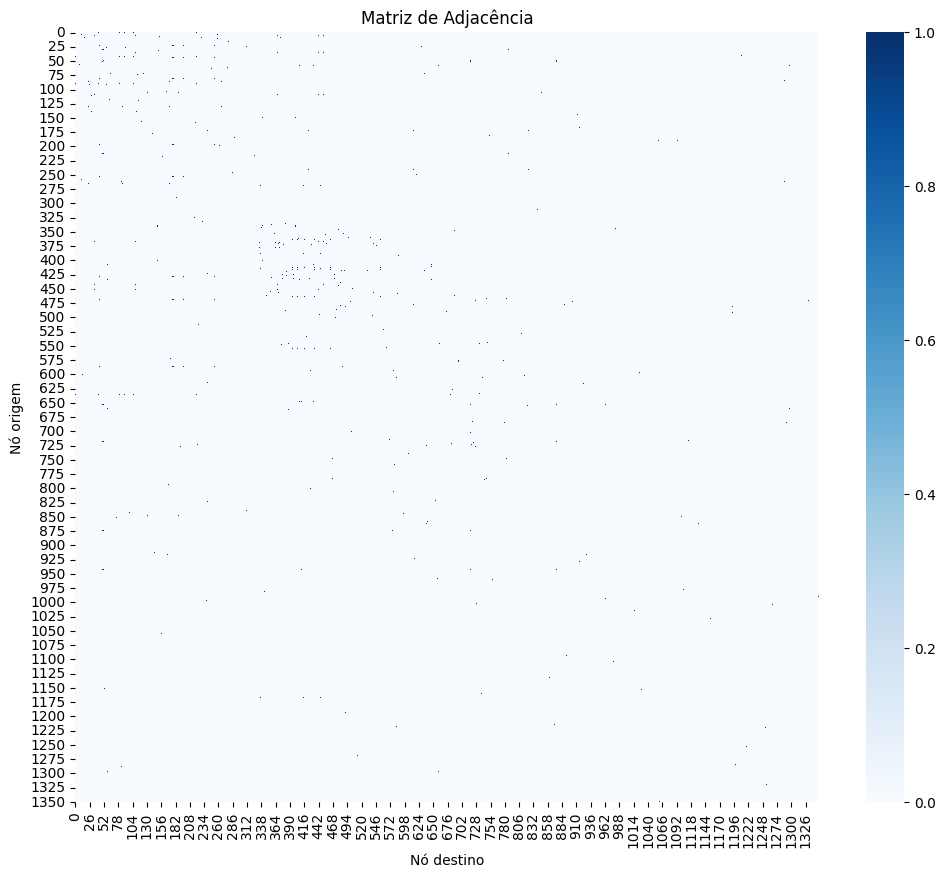

In [52]:
# Matriz de adjacência
adj_matrix = nx.adjacency_matrix(G).todense()
plt.figure(figsize=(12, 10))
sns.heatmap(adj_matrix, cmap="Blues", cbar=True)

plt.title("Matriz de Adjacência")
plt.xlabel("Nó destino")
plt.ylabel("Nó origem")
plt.show()


Diâmetro: 9
Periferia: ['B00MUTWLW4', 'B08SJVD8QD', 'B00NNQMYNE']


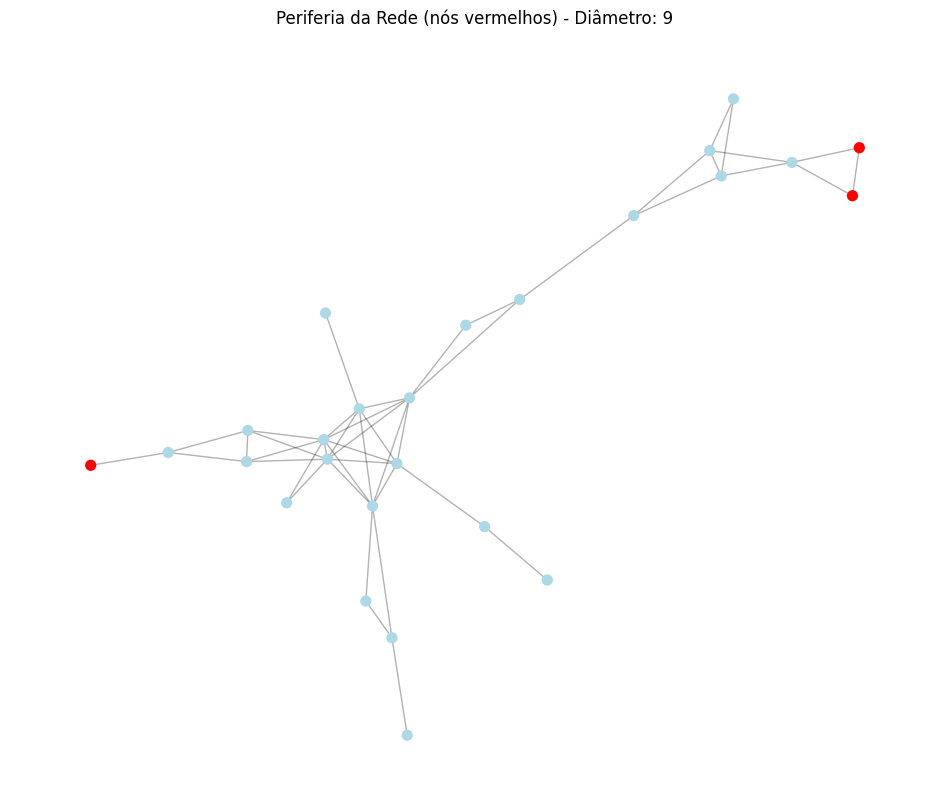

In [53]:
if not nx.is_connected(G):
    componentes = list(nx.connected_components(G))
    maior_componente = max(componentes, key=len)
    G_sub = G.subgraph(maior_componente).copy()
else:
    G_sub = G

diameter = nx.diameter(G_sub)
periphery = nx.periphery(G_sub)
print("Diâmetro:", diameter)
print("Periferia:", periphery)

pos = nx.spring_layout(G_sub, seed=42)
node_colors = ['red' if node in periphery else 'lightblue' for node in G_sub.nodes]

plt.figure(figsize=(12,10))
nx.draw_networkx_nodes(G_sub, pos, node_color=node_colors, node_size=50)
nx.draw_networkx_edges(G_sub, pos, alpha=0.3)
plt.title(f"Periferia da Rede (nós vermelhos) - Diâmetro: {diameter}")
plt.axis('off')
plt.show()


In [54]:
# Densidade da rede
density = nx.density(G_sub)
print("Densidade da rede:", density)

esparsy = 1 - density
print("Esparsidade da rede:", esparsy)

Densidade da rede: 0.14153846153846153
Esparsidade da rede: 0.8584615384615385


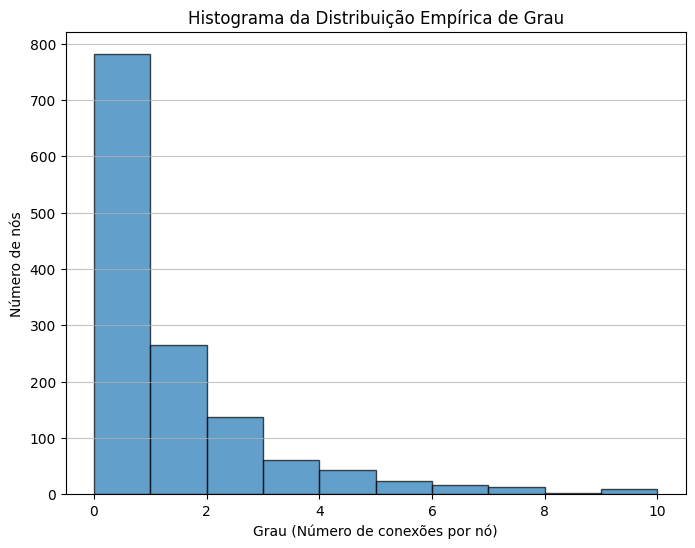

In [55]:
# Histograma de distribuição empírica de grau.

graus = [d for n, d in G.degree()]
plt.figure(figsize=(8,6))
plt.hist(graus, bins=range(min(graus), max(graus) + 2), edgecolor='black', alpha=0.7)
plt.title("Histograma da Distribuição Empírica de Grau")
plt.xlabel("Grau (Número de conexões por nó)")
plt.ylabel("Número de nós")
plt.grid(axis='y', alpha=0.75)
plt.show()


In [56]:
# Clustering local e global
clustering_local = nx.clustering(G, nodes=['B00J5DYCCA', 'B096MSW6CT'])
clustering_global = nx.average_clustering(G)
print("Clustering local:", clustering_local)
print("Clustering global:", clustering_global)

Clustering local: {'B00J5DYCCA': 1.0, 'B096MSW6CT': 0}
Clustering global: 0.1855016272484815


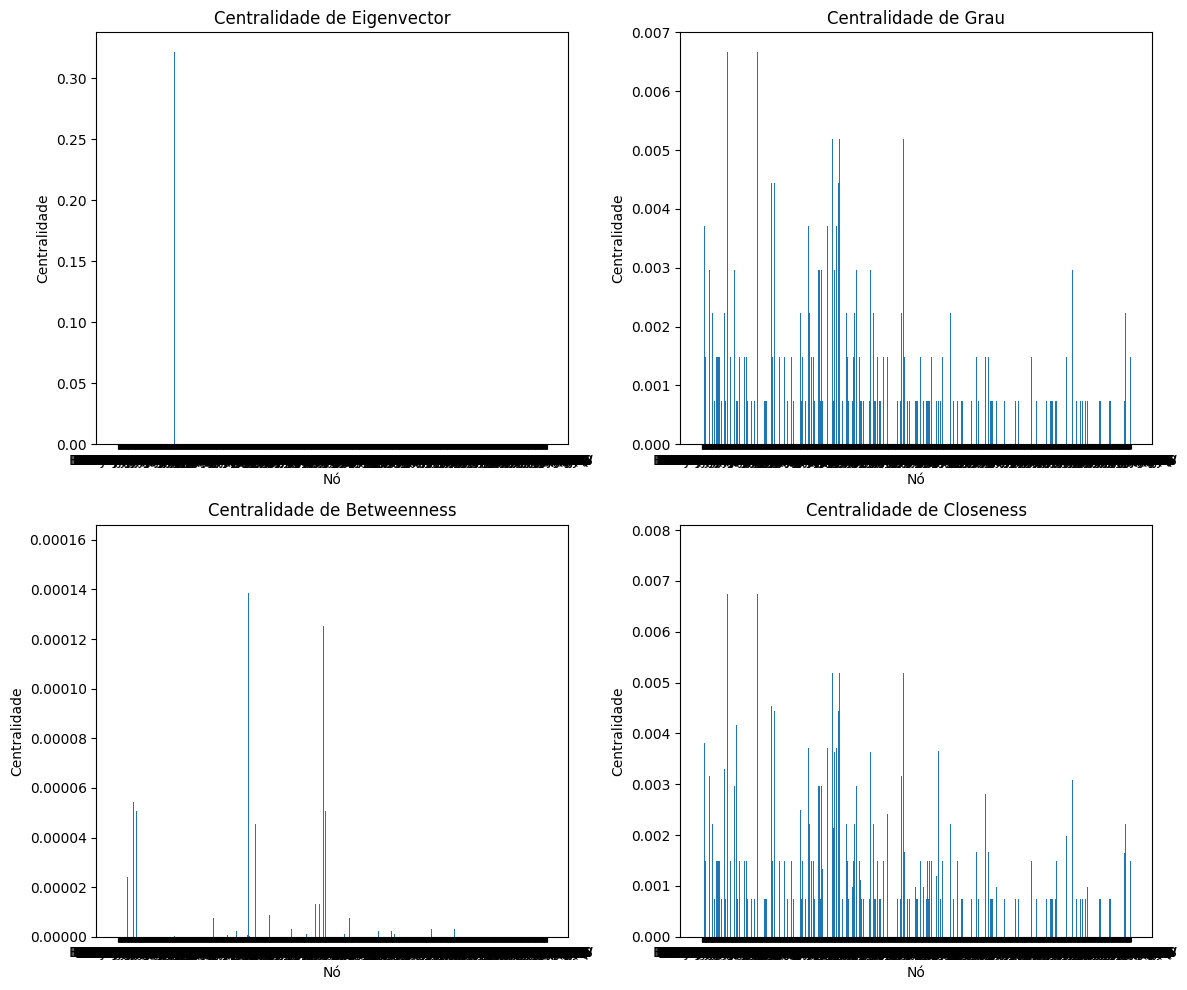

In [62]:
# Centralidade de nós
eigenvector_centrality = nx.eigenvector_centrality(G)
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.bar(eigenvector_centrality.keys(), eigenvector_centrality.values())
plt.title("Centralidade de Eigenvector")
plt.xlabel("Nó")
plt.ylabel("Centralidade")

plt.subplot(2, 2, 2)
plt.bar(degree_centrality.keys(), degree_centrality.values())
plt.title("Centralidade de Grau")
plt.xlabel("Nó")
plt.ylabel("Centralidade")

plt.subplot(2, 2, 3)
plt.bar(betweenness_centrality.keys(), betweenness_centrality.values())
plt.title("Centralidade de Betweenness")
plt.xlabel("Nó")
plt.ylabel("Centralidade")

plt.subplot(2, 2, 4)
plt.bar(closeness_centrality.keys(), closeness_centrality.values())
plt.title("Centralidade de Closeness")
plt.xlabel("Nó")
plt.ylabel("Centralidade")

plt.tight_layout()
plt.show()